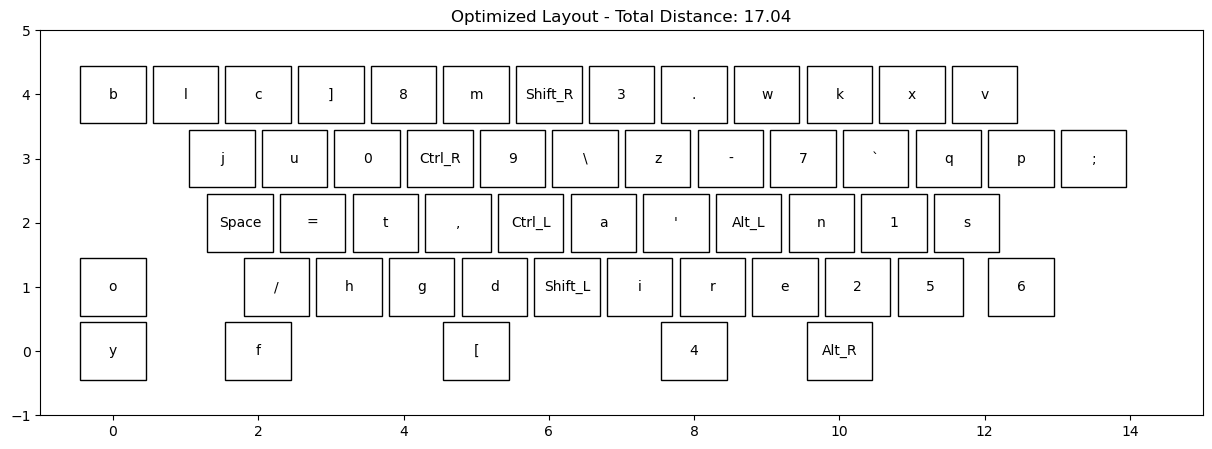

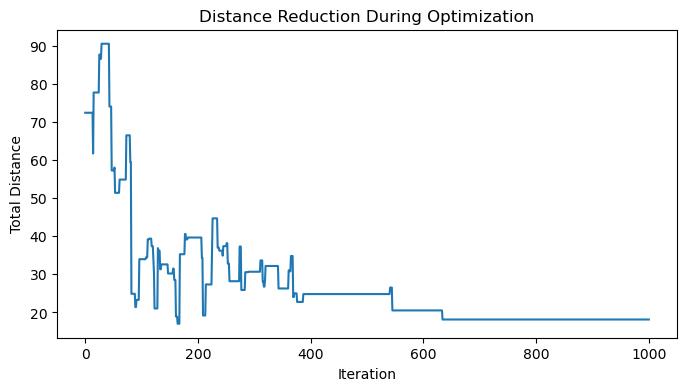

In [37]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation


# QWERTY Keyboard layout data

keys = {
    # Number row
    '`': {'pos': (0, 4), 'start': 'a'},
    '1': {'pos': (1, 4), 'start': 'a'},
    '2': {'pos': (2, 4), 'start': 'a'},
    '3': {'pos': (3, 4), 'start': 's'},
    '4': {'pos': (4, 4), 'start': 'd'},
    '5': {'pos': (5, 4), 'start': 'f'},
    '6': {'pos': (6, 4), 'start': 'j'},
    '7': {'pos': (7, 4), 'start': 'j'},
    '8': {'pos': (8, 4), 'start': 'k'},
    '9': {'pos': (9, 4), 'start': 'l'},
    '0': {'pos': (10, 4), 'start': ';'},
    '-': {'pos': (11, 4), 'start': ';'},
    '=': {'pos': (12, 4), 'start': ';'},
    
    # Top letter row
    'q': {'pos': (1.5, 3), 'start': 'a'},
    'w': {'pos': (2.5, 3), 'start': 's'},
    'e': {'pos': (3.5, 3), 'start': 'd'},
    'r': {'pos': (4.5, 3), 'start': 'f'},
    't': {'pos': (5.5, 3), 'start': 'f'},
    'y': {'pos': (6.5, 3), 'start': 'j'},
    'u': {'pos': (7.5, 3), 'start': 'j'},
    'i': {'pos': (8.5, 3), 'start': 'k'},
    'o': {'pos': (9.5, 3), 'start': 'l'},
    'p': {'pos': (10.5, 3), 'start': ';'},
    '[': {'pos': (11.5, 3), 'start': ';'},
    ']': {'pos': (12.5, 3), 'start': ';'},
    '\\': {'pos': (13.5, 3), 'start': ';'},
    
    # Home row
    'a': {'pos': (1.75, 2), 'start': 'a'},
    's': {'pos': (2.75, 2), 'start': 's'},
    'd': {'pos': (3.75, 2), 'start': 'd'},
    'f': {'pos': (4.75, 2), 'start': 'f'},
    'g': {'pos': (5.75, 2), 'start': 'f'},
    'h': {'pos': (6.75, 2), 'start': 'j'},
    'j': {'pos': (7.75, 2), 'start': 'j'},
    'k': {'pos': (8.75, 2), 'start': 'k'},
    'l': {'pos': (9.75, 2), 'start': 'l'},
    ';': {'pos': (10.75, 2), 'start': ';'},
    "'": {'pos': (11.75, 2), 'start': ';'},
    
    # Bottom letter row
    'z': {'pos': (2.25, 1), 'start': 'a'},
    'x': {'pos': (3.25, 1), 'start': 's'},
    'c': {'pos': (4.25, 1), 'start': 'd'},
    'v': {'pos': (5.25, 1), 'start': 'f'},
    'b': {'pos': (6.25, 1), 'start': 'f'},
    'n': {'pos': (7.25, 1), 'start': 'j'},
    'm': {'pos': (8.25, 1), 'start': 'j'},
    ',': {'pos': (9.25, 1), 'start': 'k'},
    '.': {'pos': (10.25, 1), 'start': 'l'},
    '/': {'pos': (11.25, 1), 'start': ';'},
    
    # Special keys
    'Shift_L': {'pos': (0, 1), 'start': 'a'},
    'Shift_R': {'pos': (12.5, 1), 'start': ';'},
    'Ctrl_L': {'pos': (0, 0), 'start': 'a'},
    'Alt_L': {'pos': (2, 0), 'start': 'a'},
    'Space': {'pos': (5, 0), 'start': 'f'},
    'Alt_R': {'pos': (8, 0), 'start': 'j'},
    'Ctrl_R': {'pos': (10, 0), 'start': ';'},
}

characters = {
    # Lowercase letters (unchanged)
    'a': ('a',), 'b': ('b',), 'c': ('c',), 'd': ('d',), 'e': ('e',),
    'f': ('f',), 'g': ('g',), 'h': ('h',), 'i': ('i',), 'j': ('j',),
    'k': ('k',), 'l': ('l',), 'm': ('m',), 'n': ('n',), 'o': ('o',),
    'p': ('p',), 'q': ('q',), 'r': ('r',), 's': ('s',), 't': ('t',),
    'u': ('u',), 'v': ('v',), 'w': ('w',), 'x': ('x',), 'y': ('y',),
    'z': ('z',),
    
    # Uppercase letters (updated)
    'A': ('Shift_R', 'a'), 'B': ('Shift_R', 'b'), 'C': ('Shift_R', 'c'),
    'D': ('Shift_R', 'd'), 'E': ('Shift_R', 'e'), 'F': ('Shift_R', 'f'),
    'G': ('Shift_R', 'g'), 'H': ('Shift_L', 'h'), 'I': ('Shift_L', 'i'),
    'J': ('Shift_L', 'j'), 'K': ('Shift_L', 'k'), 'L': ('Shift_L', 'l'),
    'M': ('Shift_L', 'm'), 'N': ('Shift_L', 'n'), 'O': ('Shift_L', 'o'),
    'P': ('Shift_L', 'p'), 'Q': ('Shift_R', 'q'), 'R': ('Shift_R', 'r'),
    'S': ('Shift_R', 's'), 'T': ('Shift_R', 't'), 'U': ('Shift_L', 'u'),
    'V': ('Shift_R', 'v'), 'W': ('Shift_R', 'w'), 'X': ('Shift_R', 'x'),
    'Y': ('Shift_L', 'y'), 'Z': ('Shift_R', 'z'),
    
    # Numbers and their shifted symbols (updated)
    '1': ('1',), '!': ('Shift_R', '1'),
    '2': ('2',), '@': ('Shift_R', '2'),
    '3': ('3',), '#': ('Shift_R', '3'),
    '4': ('4',), '$': ('Shift_R', '4'),
    '5': ('5',), '%': ('Shift_R', '5'),
    '6': ('6',), '^': ('Shift_L', '6'),
    '7': ('7',), '&': ('Shift_L', '7'),
    '8': ('8',), '*': ('Shift_L', '8'),
    '9': ('9',), '(': ('Shift_L', '9'),
    '0': ('0',), ')': ('Shift_L', '0'),
    
    # Other symbols (updated)
    '`': ('`',), '~': ('Shift_R', '`'),
    '-': ('-',), '_': ('Shift_L', '-'),
    '=': ('=',), '+': ('Shift_L', '='),
    '[': ('[',), '{': ('Shift_L', '['),
    ']': (']',), '}': ('Shift_L', ']'),
    '\\': ('\\',), '|': ('Shift_L', '\\'),
    ';': (';',), ':': ('Shift_L', ';'),
    "'": ("'",), '"': ('Shift_L', "'"),
    ',': (',',), '<': ('Shift_L', ','),
    '.': ('.',), '>': ('Shift_L', '.'),
    '/': ('/',), '?': ('Shift_L', '/'),
    
    # Space (unchanged)
    ' ': ('Space',),
}

# Function to calculate travel distance between two points
def travel_distance(pos1, pos2):
    return math.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)

# Calculate total distance for a given text and layout
def calculate_total_distance(text, layout):
    total_distance = 0
    for char in text:
        if char in characters:
            sequence = characters[char]
            start_key = sequence[0]  
            key = sequence[-1]  

            if key in layout:
                key_info = layout[key]
                pos = key_info['pos']
                start_pos = layout[start_key]['pos']
                total_distance += 2 * travel_distance(start_pos, pos)  # Double the distance

    return total_distance

# Swap two random keys and update 'start' properties
def swap_keys(layout):
    new_layout = layout.copy()
    key1, key2 = random.sample(list(new_layout.keys()), 2)
    new_layout[key1]['pos'], new_layout[key2]['pos'] = new_layout[key2]['pos'], new_layout[key1]['pos']
    return new_layout

# Simulated Annealing optimization
def simulated_annealing(text, initial_layout, initial_temp=100, cooling_rate=0.99, max_iter=1000):
    current_layout = initial_layout
    current_distance = calculate_total_distance(text, current_layout)
    best_layout = current_layout
    best_distance = current_distance
    temperature = initial_temp
    distances = [current_distance]

    for _ in range(max_iter):
        new_layout = swap_keys(current_layout)
        new_distance = calculate_total_distance(text, new_layout)
        delta = new_distance - current_distance

        if delta < 0 or random.random() < math.exp(-delta / temperature):
            current_layout = new_layout
            current_distance = new_distance
            if new_distance < best_distance:
                best_layout = new_layout
                best_distance = new_distance

        distances.append(current_distance)
        temperature *= cooling_rate

        if temperature < 1e-3:
            break

    return best_layout, best_distance, distances

# Plot the keyboard layout with rectangles
def plot_layout(layout, ax, title):
    ax.clear()
    ax.set_title(title)
    ax.set_xlim(-1, 15)
    ax.set_ylim(-1, 5)

    for key, info in layout.items():
        pos = info['pos']
        rect = Rectangle((pos[0] - 0.45, pos[1] - 0.45), 0.9, 0.9, edgecolor='black', facecolor='white')
        ax.add_patch(rect)
        ax.text(pos[0], pos[1], key, ha='center', va='center', fontsize=10)

def plot_distance_reduction(distances):
    plt.figure(figsize=(8, 4))
    plt.plot(distances)
    plt.xlabel('Iteration')
    plt.ylabel('Total Distance')
    plt.title('Distance Reduction During Optimization')
    plt.show()


# Main function
if __name__ == "__main__":
    sample_text = "Hello, World! This is a test to optimize the keyboard layout."
    optimized_layout, best_distance, distances = simulated_annealing(sample_text, keys)
    fig, ax = plt.subplots(figsize=(15, 5))
    plot_layout(optimized_layout, ax, f"Optimized Layout - Total Distance: {best_distance:.2f}")
    plot_distance_reduction(distances)
    plt.show()


Enter a string: A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.  Paragraphs can contain many different kinds of information. A paragraph could contain a series of brief examples or a single long illustration of a general point. It might describe a place, character, or process; narrate a series of events; compare or contrast two or more things; classify items into categories; or describe causes and effects. Regardless of the kind of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence.
{'rshift': 5, 'shift': 8, 'a': 83, 'spacebar': 150, 'p': 24, 'r': 60, 'g': 21, 'h': 29, 

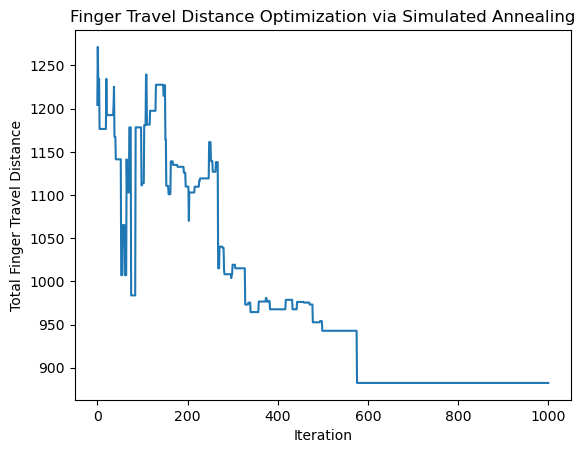

Original Layout:
row1: `1234567890-=
row2: qwertyuiop[]\
row3: asdfghjkl;'
row4: zxcvbnm,./
common_keys: ['tab', 'capslock', 'lshift', 'lctrl', 'fn', 'win', 'lalt', 'spacebar', 'ralt', 'rctrl', 'rshift', 'enter', 'backspace']

Optimized Distance: 882.3802664328814


Optimized Layout:
row1: ['2', '-', '1', '=', '7', '3', '0', '6', '9', '5', '`', '4', '8']
row2: ['i', '[', 'p', 'r', 'y', ']', 'u', 'q', 'w', 'o', 't', '\\', 'e']
row3: [';', 'g', 'k', 'd', 'j', 's', "'", 'f', 'h', 'a', 'l']
row4: ['n', 'c', ',', 'v', 'x', 'z', '.', '/', 'm', 'b']
common_keys: ['lshift', 'lalt', 'lctrl', 'capslock', 'tab', 'win', 'fn', 'ralt', 'backspace', 'enter', 'rctrl', 'rshift', 'spacebar']

Original Keyboard Layout:


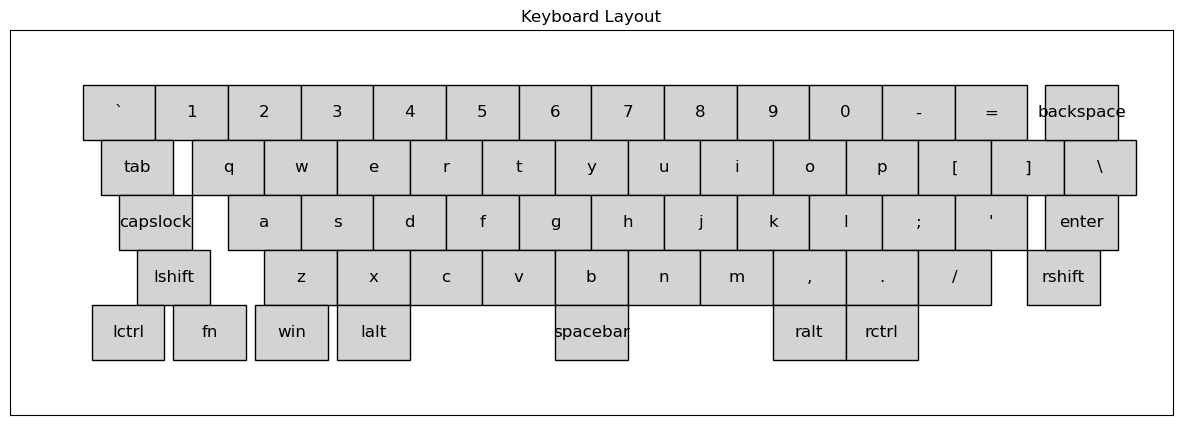

Optimized Keyboard Layout:


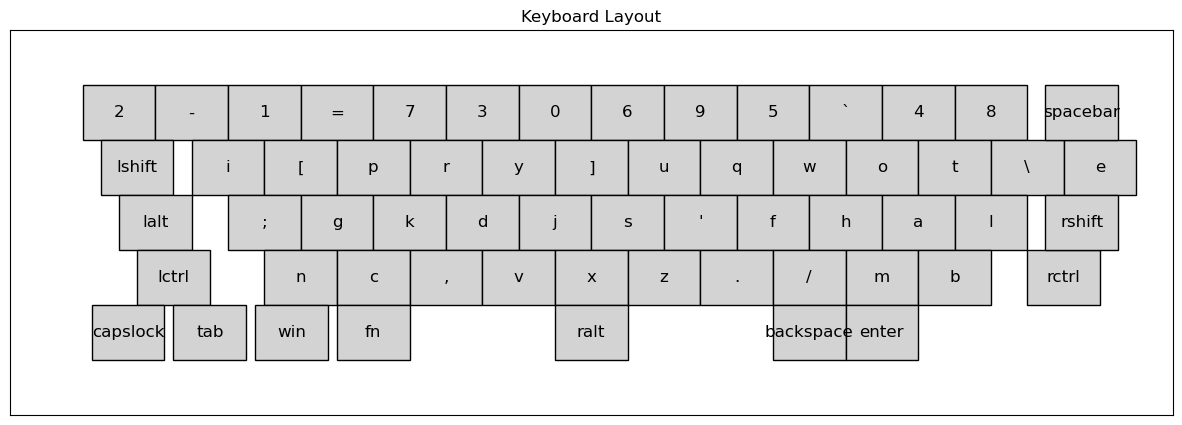

In [31]:
row1_keys = '`1234567890-='
row2_keys = 'qwertyuiop[]\\'
row3_keys = 'asdfghjkl;\''
row4_keys = 'zxcvbnm,./'

special_keys = ['tab', 'capslock', 'lshift', 'lctrl', 'fn', 'win', 'lalt', 'spacebar', 'ralt', 'rctrl', 'rshift', 'enter', 'backspace']

keyboard_layout = {
    'row1' : {
        'keys' : row1_keys,
        'positions' : [
            (0.5, 4.5), (1.5, 4.5), (2.5, 4.5), (3.5, 4.5), (4.5, 4.5), (5.5, 4.5), (6.5, 4.5), (7.5, 4.5), (8.5, 4.5), (9.5, 4.5), (10.5, 4.5), (11.5, 4.5) ,(12.5, 4.5)
        ],
        'width': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    },
    'row2' : {
        'keys' : row2_keys,
        'positions' : [
            (2, 3.5), (3, 3.5), (4, 3.5), (5, 3.5), (6, 3.5), (7, 3.5), (8, 3.5), (9, 3.5), (10, 3.5), (11, 3.5), (12, 3.5), (13, 3.5) ,(14, 3.5)
        ],
        'width': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    },
    'row3' : {
        'keys' : row3_keys,
        'positions' : [
            (2.5, 2.5), (3.5, 2.5), (4.5, 2.5), (5.5, 2.5), (6.5, 2.5), (7.5, 2.5), (8.5, 2.5), (9.5, 2.5), (10.5, 2.5), (11.5, 2.5), (12.5, 2.5)
        ],
        'width': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    },
    'row4' : {
        'keys' : row4_keys,
        'positions' : [
            (3, 1.5), (4, 1.5), (5, 1.5), (6, 1.5), (7, 1.5), (8, 1.5), (9, 1.5), (10, 1.5), (11, 1.5), (12, 1.5)
        ],
        'width': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    },

    'common_keys' :{
    'keys' : special_keys,
    'positions' : [
        (0.75, 3.5), (1, 2.5), (1.25, 1.5), (0.625, 0.5), (1.75, 0.5), (2.875, 0.5), (4, 0.5), (7, 0.5), (10, 0.5), (11, 0.5), (13.5, 1.5), (13.75, 2.5), (13.75, 4.5)
    ],
    'width' : [1.5, 2, 2.5, 1.25, 1.125, 1.125, 1.125, 5, 1, 1, 2, 1.5, 1.5]

    }

}

def update_shift_counts(layout, char):
    for row in layout.values():
        if char in row['keys']:
            idx = row['keys'].index(char)
            pos = row['positions'][idx]
            row2_width_half = sum(layout['row2']['width']) / 2
            if pos[0] < row2_width_half:
                dict_sample_text['rshift'] = dict_sample_text.get('rshift', 0) + 1
            else:
                dict_sample_text['lshift'] = dict_sample_text.get('lshift', 0) + 1
            break
            
shift_characters = {
    '1': '!', '2': '@', '3': '#', '4': '$', '5': '%', '6': '^', '7': '&', '8': '*', '9': '(', '0': ')',
    '`': '~', '-': '_', '=': '+', '[': '{', ']': '}', '\\': '|', ';': ':', '\'': '"', ',': '<', '.': '>', '/': '?'
}

sample_text = input('Enter a string: ')
dict_sample_text = {}

for i in sample_text:
    original_char = i

    if i.isupper() or i in shift_characters.values():
        if i in shift_characters.values():
            for key, shifted_value in shift_characters.items():
                if shifted_value == i:
                    update_shift_counts(keyboard_layout, key)
                    dict_sample_text['shift'] = dict_sample_text.get('shift', 0) + 1
                    dict_sample_text[key] = dict_sample_text.get(key, 0) + 1
                    break
        else:
            update_shift_counts(keyboard_layout, i.lower())
            dict_sample_text['shift'] = dict_sample_text.get('shift', 0) + 1
            dict_sample_text[i.lower()] = dict_sample_text.get(i.lower(), 0) + 1
        continue


    if original_char == ' ':
        dict_sample_text['spacebar'] = dict_sample_text.get('spacebar', 0) + 1


    elif original_char in shift_characters:
        dict_sample_text[original_char] = dict_sample_text.get(original_char, 0) + 1

    else:
        dict_sample_text[i] = dict_sample_text.get(i, 0) + 1

print(dict_sample_text)


home_row_keys_indices = [0, 1, 2, 3, 6, 7, 8, 9]
home_row_keys = [keyboard_layout['row3']['keys'][i] for i in home_row_keys_indices] + ['spacebar']

def calculate_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def find_nearest_home_key(char_position):
    min_distance = float('inf')
    nearest_home_key = None

    for key, position in zip(keyboard_layout['row3']['keys'], keyboard_layout['row3']['positions']):
        if key in home_row_keys:
            if abs(position[0] - char_position[0]) <= 1.5:
                distance = calculate_distance(position, char_position)
                if distance < min_distance:
                    min_distance = distance
                    nearest_home_key = key
    return nearest_home_key, min_distance


total_distance = 0.0

input_dictionary = dict_sample_text

for char, count in input_dictionary.items():
    if char.lower() in home_row_keys:
        continue
    char_position = None
    for row in keyboard_layout.values():
        if char.lower() in row['keys']:
            char_position = row['positions'][row['keys'].index(char.lower())]
            break

    if char_position:
        nearest_home_key, distance = find_nearest_home_key(char_position)
        if nearest_home_key:
            total_distance += distance * count

total_distance = total_distance * 2
print("Total finger travel distance:", total_distance)

import random
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to calculate the total finger travel distance
def calculate_total_distance(layout):
    total_distance = 0.0
    input_dictionary = dict_sample_text  # The frequency of key presses from previous code
    
    for char, count in input_dictionary.items():
        if char.lower() in home_row_keys:
            continue
        char_position = None
        for row in layout.values():
            if char.lower() in row['keys']:
                char_position = row['positions'][row['keys'].index(char.lower())]
                break

        if char_position:
            nearest_home_key, distance = find_nearest_home_key(char_position)
            if nearest_home_key:
                total_distance += distance * count

    return total_distance * 2

# Simulated Annealing Algorithm
def simulated_annealing(layout, initial_temp, cooling_rate, max_iterations):
    current_layout = {row_name: row_info.copy() for row_name, row_info in layout.items()}  # Make a copy of the layout
    current_distance = calculate_total_distance(current_layout)
    best_layout = current_layout.copy()
    best_distance = current_distance
    
    distances = [current_distance]  # Track distances for plotting

    temperature = initial_temp

    for iteration in range(max_iterations):
        # Create a new layout by swapping two random keys
        new_layout = {row_name: row_info.copy() for row_name, row_info in current_layout.items()}  # Copy layout
        row_key = random.choice(list(new_layout.keys()))
        key_indices = list(range(len(new_layout[row_key]['keys'])))
        idx1, idx2 = random.sample(key_indices, 2)

        # Swap keys
        new_layout[row_key]['keys'] = list(new_layout[row_key]['keys'])
        new_layout[row_key]['keys'][idx1], new_layout[row_key]['keys'][idx2] = (
            new_layout[row_key]['keys'][idx2],
            new_layout[row_key]['keys'][idx1]
        )

        # Calculate new distance
        new_distance = calculate_total_distance(new_layout)
        
        # Acceptance criterion
        if new_distance < current_distance or random.random() < math.exp((current_distance - new_distance) / temperature):
            current_layout = new_layout
            current_distance = new_distance

            # Update best layout found
            if new_distance < best_distance:
                best_layout = new_layout.copy()
                best_distance = new_distance

        # Introduce some exploration by accepting a move with a certain probability in the first few iterations
        elif iteration < 100:  # Allow exploration in the first 100 iterations
            current_layout = new_layout
            current_distance = new_distance

        distances.append(current_distance)
        
        # Cool down the temperature
        temperature *= cooling_rate

    return best_layout, best_distance, distances

# Function to visualize the keyboard layout
def plot_keyboard(layout):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_xlim(-1, 15)
    ax.set_ylim(-1, 6)
    ax.set_xticks([])
    ax.set_yticks([])

    for row_index, (row_name, row_info) in enumerate(layout.items()):
        for key_index, (key, position) in enumerate(zip(row_info['keys'], row_info['positions'])):
            rect = patches.Rectangle((position[0] - 0.5, position[1] - 0.5), 1, 1, edgecolor='black', facecolor='lightgray')
            ax.add_patch(rect)
            ax.text(position[0], position[1], key, ha='center', va='center', fontsize=12)

    plt.title('Keyboard Layout')
    plt.grid(False)
    plt.show()

# Initial parameters for simulated annealing
initial_temperature = 1000
cooling_rate = 0.99
max_iterations = 1000

# Run simulated annealing
optimized_layout, optimized_distance, distance_history = simulated_annealing(keyboard_layout, initial_temperature, cooling_rate, max_iterations)

# Plotting the distance history without grid
plt.plot(distance_history)
plt.title('Finger Travel Distance Optimization via Simulated Annealing')
plt.xlabel('Iteration')
plt.ylabel('Total Finger Travel Distance')
plt.grid(False)  # Remove the grid
plt.show()

# Print original and optimized layouts and their distances
print("Original Layout:")
for row_name, row_info in keyboard_layout.items():
    print(f"{row_name}: {row_info['keys']}")

print(f"\nOptimized Distance: {optimized_distance}\n")

print("\nOptimized Layout:")
for row_name, row_info in optimized_layout.items():
    print(f"{row_name}: {row_info['keys']}")

# Visualize the original and optimized keyboard layouts
print("\nOriginal Keyboard Layout:")
plot_keyboard(keyboard_layout)

print("Optimized Keyboard Layout:")
plot_keyboard(optimized_layout)


Enter your text: @ wug  923ry )(IJ 
Optimized Layout:
`: (10.75, 2)
1: (5.75, 2)
2: (7, 4)
3: (7.5, 3)
4: (10, 0)
5: (3.75, 2)
6: (11.75, 2)
7: (2, 4)
8: (6, 4)
9: (6.75, 2)
0: (9, 4)
-: (3.25, 1)
=: (10.5, 3)
q: (0, 0)
w: (5, 0)
e: (9.5, 3)
r: (8.75, 2)
t: (8, 4)
y: (10, 4)
u: (5.25, 1)
i: (8, 0)
o: (2, 0)
p: (11, 4)
[: (6.5, 3)
]: (7.75, 2)
\: (2.5, 3)
a: (8.25, 1)
s: (2.25, 1)
d: (10.25, 1)
f: (13.5, 3)
g: (7.25, 1)
h: (5.5, 3)
j: (4.75, 2)
k: (9.75, 2)
l: (12.5, 3)
;: (4.5, 3)
': (5, 4)
z: (9.25, 1)
x: (0, 4)
c: (6.25, 1)
v: (3, 4)
b: (12.5, 1)
n: (12, 4)
m: (0, 1)
,: (4, 4)
.: (4.25, 1)
/: (1.5, 3)
Shift_L: (8.5, 3)
Shift_R: (3.5, 3)
Ctrl_L: (11.25, 1)
Alt_L: (11.5, 3)
Space: (1, 4)
Alt_R: (1.75, 2)
Ctrl_R: (2.75, 2)
Minimum Travel Distance: 11.241685163351205

Initial and Optimized Layouts:


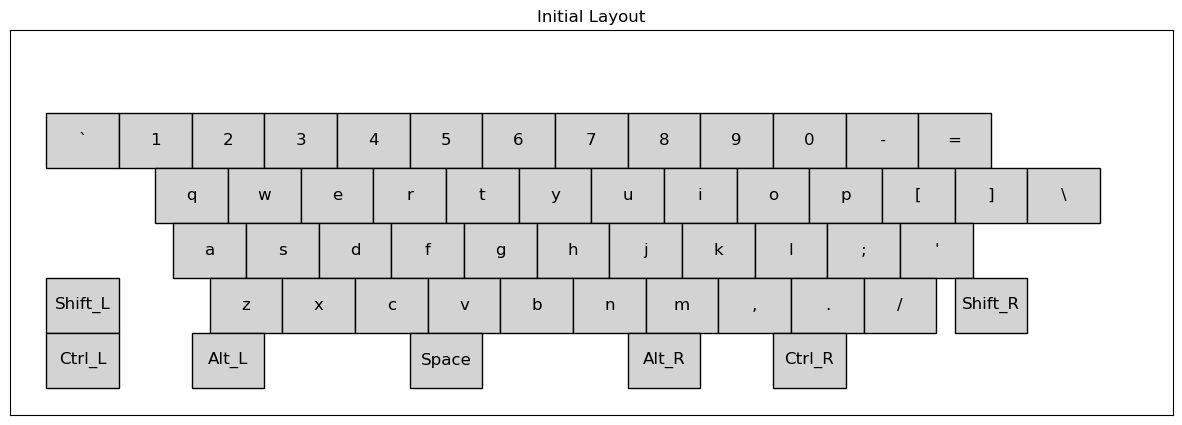

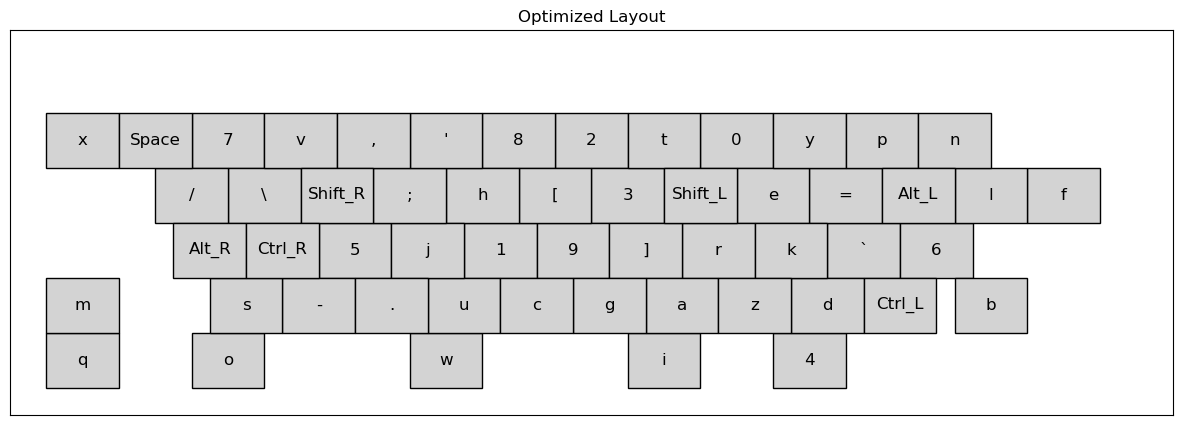

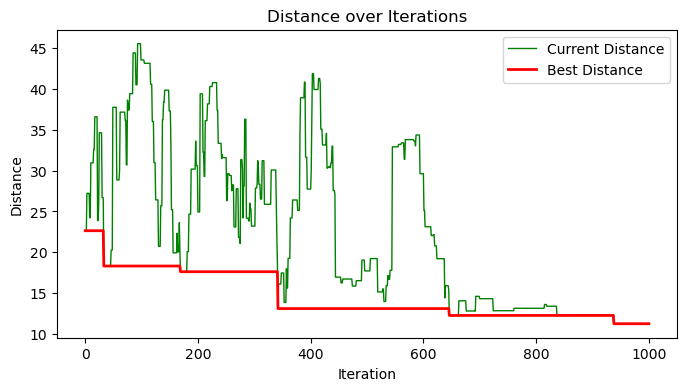

In [48]:
import numpy as np
import random
import math
import copy
import matplotlib.pyplot as plt
from matplotlib import patches

# Keyboard layout data
# QWERTY Keyboard layout data

keys = {
    # Number row
    '`': {'pos': (0, 4), 'start': 'a'},
    '1': {'pos': (1, 4), 'start': 'a'},
    '2': {'pos': (2, 4), 'start': 'a'},
    '3': {'pos': (3, 4), 'start': 's'},
    '4': {'pos': (4, 4), 'start': 'd'},
    '5': {'pos': (5, 4), 'start': 'f'},
    '6': {'pos': (6, 4), 'start': 'j'},
    '7': {'pos': (7, 4), 'start': 'j'},
    '8': {'pos': (8, 4), 'start': 'k'},
    '9': {'pos': (9, 4), 'start': 'l'},
    '0': {'pos': (10, 4), 'start': ';'},
    '-': {'pos': (11, 4), 'start': ';'},
    '=': {'pos': (12, 4), 'start': ';'},
    
    # Top letter row
    'q': {'pos': (1.5, 3), 'start': 'a'},
    'w': {'pos': (2.5, 3), 'start': 's'},
    'e': {'pos': (3.5, 3), 'start': 'd'},
    'r': {'pos': (4.5, 3), 'start': 'f'},
    't': {'pos': (5.5, 3), 'start': 'f'},
    'y': {'pos': (6.5, 3), 'start': 'j'},
    'u': {'pos': (7.5, 3), 'start': 'j'},
    'i': {'pos': (8.5, 3), 'start': 'k'},
    'o': {'pos': (9.5, 3), 'start': 'l'},
    'p': {'pos': (10.5, 3), 'start': ';'},
    '[': {'pos': (11.5, 3), 'start': ';'},
    ']': {'pos': (12.5, 3), 'start': ';'},
    '\\': {'pos': (13.5, 3), 'start': ';'},
    
    # Home row
    'a': {'pos': (1.75, 2), 'start': 'a'},
    's': {'pos': (2.75, 2), 'start': 's'},
    'd': {'pos': (3.75, 2), 'start': 'd'},
    'f': {'pos': (4.75, 2), 'start': 'f'},
    'g': {'pos': (5.75, 2), 'start': 'f'},
    'h': {'pos': (6.75, 2), 'start': 'j'},
    'j': {'pos': (7.75, 2), 'start': 'j'},
    'k': {'pos': (8.75, 2), 'start': 'k'},
    'l': {'pos': (9.75, 2), 'start': 'l'},
    ';': {'pos': (10.75, 2), 'start': ';'},
    "'": {'pos': (11.75, 2), 'start': ';'},
    
    # Bottom letter row
    'z': {'pos': (2.25, 1), 'start': 'a'},
    'x': {'pos': (3.25, 1), 'start': 's'},
    'c': {'pos': (4.25, 1), 'start': 'd'},
    'v': {'pos': (5.25, 1), 'start': 'f'},
    'b': {'pos': (6.25, 1), 'start': 'f'},
    'n': {'pos': (7.25, 1), 'start': 'j'},
    'm': {'pos': (8.25, 1), 'start': 'j'},
    ',': {'pos': (9.25, 1), 'start': 'k'},
    '.': {'pos': (10.25, 1), 'start': 'l'},
    '/': {'pos': (11.25, 1), 'start': ';'},
    
    # Special keys
    'Shift_L': {'pos': (0, 1), 'start': 'a'},
    'Shift_R': {'pos': (12.5, 1), 'start': ';'},
    'Ctrl_L': {'pos': (0, 0), 'start': 'a'},
    'Alt_L': {'pos': (2, 0), 'start': 'a'},
    'Space': {'pos': (5, 0), 'start': 'f'},
    'Alt_R': {'pos': (8, 0), 'start': 'j'},
    'Ctrl_R': {'pos': (10, 0), 'start': ';'},
}

characters = {
    # Lowercase letters (unchanged)
    'a': ('a',), 'b': ('b',), 'c': ('c',), 'd': ('d',), 'e': ('e',),
    'f': ('f',), 'g': ('g',), 'h': ('h',), 'i': ('i',), 'j': ('j',),
    'k': ('k',), 'l': ('l',), 'm': ('m',), 'n': ('n',), 'o': ('o',),
    'p': ('p',), 'q': ('q',), 'r': ('r',), 's': ('s',), 't': ('t',),
    'u': ('u',), 'v': ('v',), 'w': ('w',), 'x': ('x',), 'y': ('y',),
    'z': ('z',),
    
    # Uppercase letters (updated)
    'A': ('Shift_R', 'a'), 'B': ('Shift_R', 'b'), 'C': ('Shift_R', 'c'),
    'D': ('Shift_R', 'd'), 'E': ('Shift_R', 'e'), 'F': ('Shift_R', 'f'),
    'G': ('Shift_R', 'g'), 'H': ('Shift_L', 'h'), 'I': ('Shift_L', 'i'),
    'J': ('Shift_L', 'j'), 'K': ('Shift_L', 'k'), 'L': ('Shift_L', 'l'),
    'M': ('Shift_L', 'm'), 'N': ('Shift_L', 'n'), 'O': ('Shift_L', 'o'),
    'P': ('Shift_L', 'p'), 'Q': ('Shift_R', 'q'), 'R': ('Shift_R', 'r'),
    'S': ('Shift_R', 's'), 'T': ('Shift_R', 't'), 'U': ('Shift_L', 'u'),
    'V': ('Shift_R', 'v'), 'W': ('Shift_R', 'w'), 'X': ('Shift_R', 'x'),
    'Y': ('Shift_L', 'y'), 'Z': ('Shift_R', 'z'),
    
    # Numbers and their shifted symbols (updated)
    '1': ('1',), '!': ('Shift_R', '1'),
    '2': ('2',), '@': ('Shift_R', '2'),
    '3': ('3',), '#': ('Shift_R', '3'),
    '4': ('4',), '$': ('Shift_R', '4'),
    '5': ('5',), '%': ('Shift_R', '5'),
    '6': ('6',), '^': ('Shift_L', '6'),
    '7': ('7',), '&': ('Shift_L', '7'),
    '8': ('8',), '*': ('Shift_L', '8'),
    '9': ('9',), '(': ('Shift_L', '9'),
    '0': ('0',), ')': ('Shift_L', '0'),
    
    # Other symbols (updated)
    '`': ('`',), '~': ('Shift_R', '`'),
    '-': ('-',), '_': ('Shift_L', '-'),
    '=': ('=',), '+': ('Shift_L', '='),
    '[': ('[',), '{': ('Shift_L', '['),
    ']': (']',), '}': ('Shift_L', ']'),
    '\\': ('\\',), '|': ('Shift_L', '\\'),
    ';': (';',), ':': ('Shift_L', ';'),
    "'": ("'",), '"': ('Shift_L', "'"),
    ',': (',',), '<': ('Shift_L', ','),
    '.': ('.',), '>': ('Shift_L', '.'),
    '/': ('/',), '?': ('Shift_L', '/'),
    
    # Space (unchanged)
    ' ': ('Space',),
}


# Calculate travel distance
def calculate_distance(route, coordinates):
    total_distance = 0
    for i in range(len(route) - 1):
        x1, y1 = coordinates[route[i]]
        x2, y2 = coordinates[route[i + 1]]
        total_distance += math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return total_distance

# Get random neighboring layout
def get_neighbour_layout(current_layout):
    new_layout = copy.deepcopy(current_layout)
    keys_list = list(new_layout.keys())
    i, j = random.sample(range(len(keys_list)), 2)

    # Swap positions
    key1, key2 = keys_list[i], keys_list[j]
    new_layout[key1]['pos'], new_layout[key2]['pos'] = new_layout[key2]['pos'], new_layout[key1]['pos']
    return new_layout

# Simulated Annealing Optimization
def simulated_annealing_keyboard(text, initial_temp=1000, cooling_rate=0.99, num_iterations=1000):
    current_layout = copy.deepcopy(keys)
    coordinates = [current_layout[char]['pos'] for char in text if char in current_layout]
    current_distance = calculate_distance(range(len(coordinates)), coordinates)

    best_layout = copy.deepcopy(current_layout)
    best_distance = current_distance

    temp = initial_temp
    distances = [current_distance]

    for i in range(num_iterations):
        neighbour_layout = get_neighbour_layout(current_layout)
        neighbour_coordinates = [neighbour_layout[char]['pos'] for char in text if char in neighbour_layout]
        neighbour_distance = calculate_distance(range(len(neighbour_coordinates)), neighbour_coordinates)

        p = np.exp((current_distance - neighbour_distance) / temp)
        if neighbour_distance < current_distance or random.random() < p:
            current_layout = neighbour_layout
            current_distance = neighbour_distance

            if current_distance < best_distance:
                best_layout = copy.deepcopy(current_layout)
                best_distance = current_distance

        temp *= cooling_rate
        distances.append(current_distance)

    return best_layout, best_distance, distances

# Plot the distances over iterations
def plot_distances(distances):
    plt.figure(figsize=(8, 4))
    plt.plot(distances, color='green', linewidth=1, label='Current Distance')
    plt.plot([min(distances[:i+1]) for i in range(len(distances))], color='red', linewidth=2, label='Best Distance')
    plt.title("Distance over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Distance")
    plt.legend()
    plt.show()

# Plot keyboard layout
def plot_keyboard(layout, title):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_xlim(-1, 15)
    ax.set_ylim(-1, 6)
    ax.set_xticks([])
    ax.set_yticks([])

    for key, info in layout.items():
        pos = info['pos']
        rect = patches.Rectangle((pos[0] - 0.5, pos[1] - 0.5), 1, 1, edgecolor='black', facecolor='lightgray')
        ax.add_patch(rect)
        ax.text(pos[0], pos[1], key, ha='center', va='center', fontsize=12)

    ax.set_title(title)
    plt.show()

# Main Execution
text = input("Enter your text: ")
best_layout, best_distance, distances = simulated_annealing_keyboard(text)


print("Minimum Travel Distance:", best_distance)

# Plot layouts
print("\nInitial and Optimized Layouts:")
plot_keyboard(keys, "Initial Layout")
plot_keyboard(best_layout, "Optimized Layout")

# Plot distance evolution
plot_distances(distances)

